   # STOCK PRICE PREDICTION USING MACHINE LEARNING [LSTM]


<img src="sm3.jpg" style ="width:700px; height:350px "/>

# Project Objective :-

###  AIM : To predict the future closing value of a given stock across a given period of time using Machine Learning Technique
                      

## Importing Required Libraries:

Firstly , we are installing the required libraries for our project and importing them in the Jupyter notebook



In [1]:
#Importing the Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

## Collecting Dataset 

In this step we have downloaded the "ITC" companies dataset from Kaggle Website and imported it into our Notebook using Pandas Library

In [2]:
#Converting CSV file into a dataframe

df = pd.read_csv("MARUTI.NS.csv")

In [3]:
#View of the entire data

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-07-09,164.899994,170.399994,155.000000,164.300003,144.897507,35164284.0
1,2003-07-10,167.000000,168.699997,164.500000,167.000000,147.278656,10464179.0
2,2003-07-11,167.750000,174.850006,166.250000,173.350006,152.878799,11740117.0
3,2003-07-14,174.250000,179.250000,174.250000,177.949997,156.935577,5982324.0
4,2003-07-15,200.000000,200.000000,173.000000,176.199997,155.392197,6173689.0
...,...,...,...,...,...,...,...
4548,2021-11-02,7647.950195,7910.000000,7630.799805,7791.750000,7791.750000,1302733.0
4549,2021-11-03,7791.750000,7842.250000,7711.600098,7734.250000,7734.250000,656492.0
4550,2021-11-04,7774.700195,7819.950195,7735.500000,7747.399902,7747.399902,53365.0
4551,2021-11-08,7759.950195,7882.600098,7672.000000,7684.600098,7684.600098,428433.0


In [4]:
pd.options.mode.chained_assignment = None

## Data Cleaning and Data Discretization 

In this step we are removing the data that is not required for our analysis and checking the integrity of Data

In [5]:
df.drop(["Adj Close","Volume"],inplace = True , axis = 1)

In [6]:
#Basic Information about Columns in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553 entries, 0 to 4552
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4553 non-null   object 
 1   Open    4539 non-null   float64
 2   High    4539 non-null   float64
 3   Low     4539 non-null   float64
 4   Close   4539 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.0+ KB


In [7]:
#Statistical Information of data

df.describe()

,Open,High,Low,Close
count,4539.000000,4539.000000,4539.000000,4539.000000
mean,3045.889031,3082.088503,3006.345756,3043.183134
std,2798.850948,2823.984933,2768.752799,2794.477043
min,164.000000,168.699997,155.000000,164.300003
25%,831.475006,845.000000,813.524994,830.975006
50%,1437.000000,1459.900024,1413.000000,1436.900024
75%,5698.475098,5750.899902,5646.899902,5690.150147
max,9966.000000,9996.400391,9725.000000,9832.450195


In [8]:
#Checking if there are any Null or NA values 

df.isna().any()

Date     False
Open      True
High      True
Low       True
Close     True
dtype: bool

In [9]:
df.isnull().any()

Date     False
Open      True
High      True
Low       True
Close     True
dtype: bool

In [10]:
df[df["Close"].isnull()]

,Date,Open,High,Low,Close
1617,2009-12-23,NaN,NaN,NaN,NaN
1618,2009-12-24,NaN,NaN,NaN,NaN
1619,2009-12-29,NaN,NaN,NaN,NaN
1620,2009-12-30,NaN,NaN,NaN,NaN
1621,2009-12-31,NaN,NaN,NaN,NaN
1646,2010-02-06,NaN,NaN,NaN,NaN
2124,2012-01-07,NaN,NaN,NaN,NaN
2163,2012-03-03,NaN,NaN,NaN,NaN
2293,2012-09-08,NaN,NaN,NaN,NaN
2335,2012-11-11,NaN,NaN,NaN,NaN


In [11]:
df = df.dropna()

In [12]:
df = df.reset_index(drop = True)

In [13]:
#Resetting the Index to 'Date'

df.set_index(["Date"],inplace = True)

In [14]:
df

,Open,High,Low,Close
Date,,,,
2003-07-09,164.899994,170.399994,155.000000,164.300003
2003-07-10,167.000000,168.699997,164.500000,167.000000
2003-07-11,167.750000,174.850006,166.250000,173.350006
2003-07-14,174.250000,179.250000,174.250000,177.949997
2003-07-15,200.000000,200.000000,173.000000,176.199997
...,...,...,...,...
2021-11-02,7647.950195,7910.000000,7630.799805,7791.750000
2021-11-03,7791.750000,7842.250000,7711.600098,7734.250000
2021-11-04,7774.700195,7819.950195,7735.500000,7747.399902


In [15]:
df['Date'] = pd.to_datetime(df.index)


#Plotting Close Price History

plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df.Date,df.Close)
plt.xlabel("Date")
plt.ylabel("Closing Price In Rupees")
plt.show()

# Feature Selection

In this Project we selected 'Close' price as a feature as we have to predict Closing price of the stock

In [16]:
#Create a new dataframe with only "Close Price"

data = df.filter(["Close"])

In [17]:
data

,Close
Date,
2003-07-09,164.300003
2003-07-10,167.000000
2003-07-11,173.350006
2003-07-14,177.949997
2003-07-15,176.199997
...,...
2021-11-02,7791.750000
2021-11-03,7734.250000
2021-11-04,7747.399902


In [18]:
#Converting dataframe into numpy array

dataset = data.values

In [19]:
dataset

array([[ 164.300003],
       [ 167.      ],
       [ 173.350006],
       ...,
       [7747.399902],
       [7684.600098],
       [7577.549805]])

#  Data Preprocessing

After the dataset is transformed into a clean dataset, the dataset is divided into training and testing sets so as to evaluate.

In [20]:
#Scaling the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [21]:
scaled_data

array([[0.00000000e+00],
       [2.79267176e-04],
       [9.36063551e-04],
       ...,
       [7.84338239e-01],
       [7.77842705e-01],
       [7.66770236e-01]])

In [22]:
#Training data split

training_data_len = math.ceil(len(dataset) *.70)

In [23]:
training_data_len

3178

In [24]:
#Creating the scaled training data set

train_data = scaled_data[0:training_data_len ,:]
train_data


array([[0.00000000e+00],
       [2.79267176e-04],
       [9.36063551e-04],
       ...,
       [3.79240084e-01],
       [3.78112656e-01],
       [3.77243834e-01]])

In [25]:
len(train_data)

3178

In [26]:
#Splitting into x_train and y_train datasets
x_train = []
y_train = []

for i in range(100,len(train_data)):
    x_train.append(train_data[i-100:i ,0])
    y_train.append(train_data[i,0])

In [27]:
#Converting datasets into numpy arrays

x_train , y_train = np.array(x_train),np.array(y_train)

In [28]:
x_train

array([[0.00000000e+00, 2.79267176e-04, 9.36063551e-04, ...,
        1.65233247e-02, 1.68543096e-02, 1.78938040e-02],
       [2.79267176e-04, 9.36063551e-04, 1.41185167e-03, ...,
        1.68543096e-02, 1.78938040e-02, 1.78938040e-02],
       [9.36063551e-04, 1.41185167e-03, 1.23084497e-03, ...,
        1.78938040e-02, 1.78938040e-02, 1.82454767e-02],
       ...,
       [4.60739615e-01, 4.61592933e-01, 4.58831318e-01, ...,
        3.82193059e-01, 3.70665523e-01, 3.75495811e-01],
       [4.61592933e-01, 4.58831318e-01, 4.55092247e-01, ...,
        3.70665523e-01, 3.75495811e-01, 3.79240084e-01],
       [4.58831318e-01, 4.55092247e-01, 4.52852895e-01, ...,
        3.75495811e-01, 3.79240084e-01, 3.78112656e-01]])

In [29]:
y_train

array([0.0178938 , 0.01824548, 0.01864886, ..., 0.37924008, 0.37811266,
       0.37724383])

In [30]:
x_train.shape ,y_train.shape

((3078, 100), (3078,))

In [31]:
#Reshaping the data

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

# Building LSTM Model

In [32]:
#Building LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# Training the Model

In [33]:
#Training the Model

model.fit(x_train , y_train,batch_size=64,epochs=150)

Epoch 1/150
49/49 [==============================] - 14s 153ms/step - loss: 0.0022
Epoch 2/150
49/49 [==============================] - 7s 141ms/step - loss: 7.6512e-05
Epoch 3/150
49/49 [==============================] - 7s 143ms/step - loss: 6.5138e-05
Epoch 4/150
49/49 [==============================] - 7s 142ms/step - loss: 5.9980e-05
Epoch 5/150
49/49 [==============================] - 7s 148ms/step - loss: 5.7786e-05
Epoch 6/150
49/49 [==============================] - 8s 157ms/step - loss: 5.8703e-05
Epoch 7/150
49/49 [==============================] - 8s 161ms/step - loss: 5.8427e-05
Epoch 8/150
49/49 [==============================] - 8s 153ms/step - loss: 5.4816e-05
Epoch 9/150
49/49 [==============================] - 7s 149ms/step - loss: 5.7866e-05
Epoch 10/150
49/49 [==============================] - 7s 150ms/step - loss: 5.7438e-05
Epoch 11/150
49/49 [==============================] - 7s 148ms/step - loss: 5.1832e-05
Epoch 12/150
49/49 [==============================] - 7

Epoch 95/150
49/49 [==============================] - 8s 164ms/step - loss: 1.3113e-05
Epoch 96/150
49/49 [==============================] - 8s 158ms/step - loss: 1.2692e-05
Epoch 97/150
49/49 [==============================] - 8s 163ms/step - loss: 1.1924e-05
Epoch 98/150
49/49 [==============================] - 7s 151ms/step - loss: 2.2650e-05
Epoch 99/150
49/49 [==============================] - 7s 149ms/step - loss: 1.2064e-05
Epoch 100/150
49/49 [==============================] - 8s 160ms/step - loss: 1.3365e-05
Epoch 101/150
49/49 [==============================] - 7s 149ms/step - loss: 1.3465e-05
Epoch 102/150
49/49 [==============================] - 8s 160ms/step - loss: 1.2146e-05
Epoch 103/150
49/49 [==============================] - 7s 150ms/step - loss: 1.2038e-05
Epoch 104/150
49/49 [==============================] - 7s 147ms/step - loss: 1.4305e-05
Epoch 105/150
49/49 [==============================] - 7s 144ms/step - loss: 1.1516e-05
Epoch 106/150
49/49 [================

#  Test Dataset Update

In [34]:
#Creating the testing data set
test_data = scaled_data[training_data_len-100:,:]

len(test_data)

1461

In [35]:
#Creating the x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(100,len(test_data)):
    x_test.append(test_data[i-100:i,0])

In [36]:
#Converting test data into numpy array

x_test =np.array(x_test)

In [37]:
x_test

array([[0.45509225, 0.45285289, 0.44629014, ..., 0.37924008, 0.37811266,
        0.37724383],
       [0.45285289, 0.44629014, 0.44825535, ..., 0.37811266, 0.37724383,
        0.37986068],
       [0.44629014, 0.44825535, 0.44646079, ..., 0.37724383, 0.37986068,
        0.37800922],
       ...,
       [0.73018102, 0.72542833, 0.72422851, ..., 0.77070067, 0.78892548,
        0.78297811],
       [0.72542833, 0.72422851, 0.71885002, ..., 0.78892548, 0.78297811,
        0.78433824],
       [0.72422851, 0.71885002, 0.70386268, ..., 0.78297811, 0.78433824,
        0.7778427 ]])

In [38]:
x_test.shape

(1361, 100)

In [39]:
y_test

array([[3836.850098],
       [3818.949951],
       [3846.5     ],
       ...,
       [7747.399902],
       [7684.600098],
       [7577.549805]])

In [40]:
y_test.shape

(1361, 1)

In [41]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# Predicting Test Values Using Model

In [42]:
#Getting predicted values of x_test using the model

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [43]:
predictions

array([[3892.161 ],
       [3922.2715],
       [3895.1826],
       ...,
       [7720.342 ],
       [7806.158 ],
       [7693.2397]], dtype=float32)

In [44]:
predictions.shape

(1361, 1)

# Error Calculation

In [45]:
#Calculating Root Mean Square Error Value 


test_rmse = np.sqrt(np.mean(np.power(((y_test)-(predictions)),2)))

test_rmse

140.63865647621455

In [46]:
# Calculating Root Mean Square Percentage Error
rmspe = (np.sqrt(np.mean(np.square((y_test - predictions) / y_test)))) *100 

rmspe

2.2940342843473975

In [47]:
#Calculating Mean Absolute Error 
MAE = abs(np.mean((y_test)-(predictions)))

MAE

51.16391343948612

# Visualisation of Output

In [48]:
#Plotting the Data

train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions



In [49]:
valid

,Close,Predictions
Date,,
2016-05-05,3836.850098,3892.160889
2016-05-06,3818.949951,3922.271484
2016-05-09,3846.500000,3895.182617
2016-05-10,3844.800049,3933.447266
2016-05-11,3890.050049,3923.003906
...,...,...
2021-11-02,7791.750000,7678.636719
2021-11-03,7734.250000,7862.808594
2021-11-04,7747.399902,7720.341797


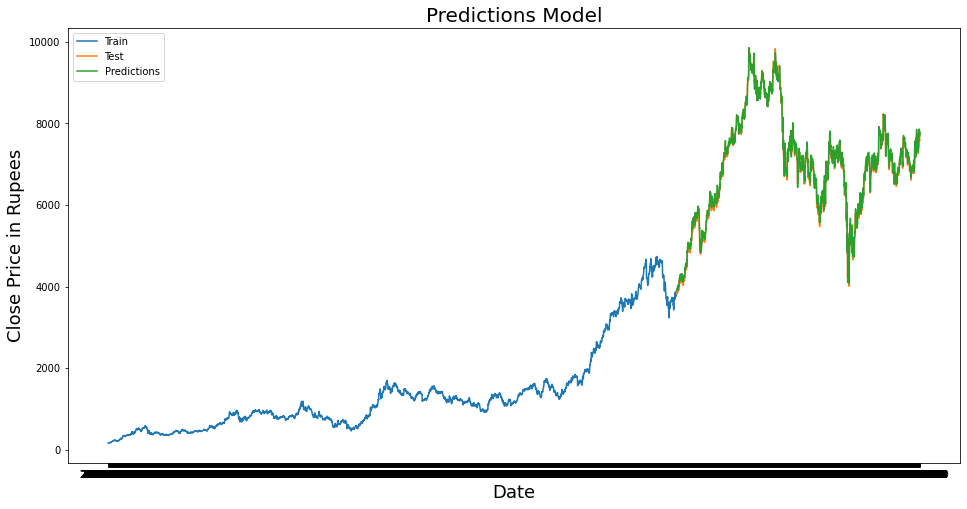

In [50]:
#Visualising the entire Data

plt.figure(figsize=(16,8))
plt.title("Predictions Model", fontsize = 20)
plt.xlabel("Date" , fontsize=18)
plt.ylabel("Close Price in Rupees" , fontsize = 18)
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Train","Test","Predictions"] ,loc="upper left")
plt.show()

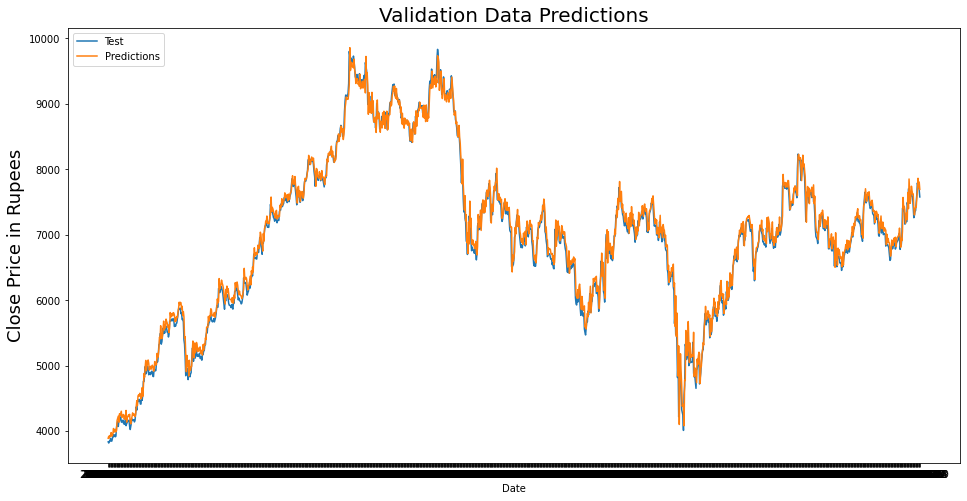

In [51]:
# Visualising the Validation Dataset Predictions 

plt.figure(figsize=(16,8))
plt.title("Validation Data Predictions", fontsize = 20)
plt.xlabel("Date")
plt.ylabel("Close Price in Rupees" , fontsize = 18)
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Test","Predictions"] ,loc="upper left")
plt.show()

# Predicting Future Values

In [52]:
len(test_data)

1461

In [53]:
x_input=test_data[1361:].reshape(1,-1)
x_input.shape


(1, 100)

In [54]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

temp_input



[0.7188500239426153,
 0.7038626789880552,
 0.7028283549652163,
 0.6966792783766883,
 0.7344838214114496,
 0.7517880926192382,
 0.7615883127356367,
 0.7741605010639248,
 0.7687044418434497,
 0.7574561680950768,
 0.7603936381835638,
 0.7674787577400102,
 0.766387566168666,
 0.7690354457000766,
 0.760295407707088,
 0.7535153834316852,
 0.7485299719472956,
 0.7510640658032509,
 0.7556564544317125,
 0.751545016440928,
 0.7408294094279416,
 0.7387866194828349,
 0.738429757525637,
 0.7241560860104603,
 0.7311016121624604,
 0.7380160279165014,
 0.7374264935291771,
 0.7314222122709035,
 0.7318825066303852,
 0.7241043698093184,
 0.7063605613668358,
 0.7047263495800687,
 0.7149920155067447,
 0.727657282860713,
 0.7176760560403177,
 0.7098824144952837,
 0.7174588379625785,
 0.715488470868389,
 0.707234585335453,
 0.7092566686307846,
 0.7082740608090877,
 0.707260443436024,
 0.6891235616626011,
 0.6951795085435719,
 0.6904940409928626,
 0.6916110906647778,
 0.6890252806076805,
 0.6866773953815302,


In [55]:
#Prediction  for next 5 days

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<5):
    
    if(len(temp_input)>100):
        
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
    
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
    
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7697302]
101
1 day input [0.70386268 0.70282835 0.69667928 0.73448382 0.75178809 0.76158831
 0.7741605  0.76870444 0.75745617 0.76039364 0.76747876 0.76638757
 0.76903545 0.76029541 0.75351538 0.74852997 0.75106407 0.75565645
 0.75154502 0.74082941 0.73878662 0.73842976 0.72415609 0.73110161
 0.73801603 0.73742649 0.73142221 0.73188251 0.72410437 0.70636056
 0.70472635 0.71499202 0.72765728 0.71767606 0.70988241 0.71745884
 0.71548847 0.70723459 0.70925667 0.70827406 0.70726044 0.68912356
 0.69517951 0.69049404 0.69161109 0.68902528 0.6866774  0.67718747
 0.66654944 0.66823022 0.68602574 0.69111464 0.68478455 0.68561201
 0.69287299 0.69119736 0.69432619 0.68440703 0.68657911 0.69396938
 0.6961156  0.69762052 0.69989088 0.70852749 0.70190261 0.68396745
 0.6895528  0.6911767  0.70209397 0.74876269 0.75087271 0.74675607
 0.74199818 0.72381993 0.72464739 0.73374429 0.72764178 0.75797333
 0.7515088  0.77951828 0.77879425 0.75690279 0.75842842 0.77498796
 0.77484832 0.76813556 0.76653236 

In [56]:
lst_output = scaler.inverse_transform(lst_output)

lst_output

array([[7606.16728354],
       [7678.44149523],
       [7738.36227858],
       [7788.90086447],
       [7832.845231  ]])

In [57]:
future_values_df = pd.read_csv("marutinewdataset.csv")
fut_df = future_values_df[:5]
fut_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-10,7570.0,7580.000000,7460.000000,7511.649902,7511.649902,562432
1,2021-11-11,7512.0,7567.500000,7442.000000,7453.450195,7453.450195,486991
2,2021-11-12,7530.0,7544.000000,7442.000000,7479.850098,7479.850098,349666
3,2021-11-15,7452.0,7579.850098,7452.000000,7503.100098,7503.100098,314414
4,2021-11-16,7545.0,8128.750000,7535.049805,8050.350098,8050.350098,2619355


In [58]:
fut_df.set_index(["Date"],inplace = True)
fut_data = fut_df.filter(["Close"])
fut_data

,Close
Date,
2021-11-10,7511.649902
2021-11-11,7453.450195
2021-11-12,7479.850098
2021-11-15,7503.100098
2021-11-16,8050.350098


In [59]:
next_5_days = fut_data[:5]

next_5_days

,Close
Date,
2021-11-10,7511.649902
2021-11-11,7453.450195
2021-11-12,7479.850098
2021-11-15,7503.100098
2021-11-16,8050.350098


In [60]:
Error =abs(np.mean(((next_5_days - lst_output) / next_5_days))*100)

Error

Close    1.768061
dtype: float64

In [61]:
future = fut_data[:5]

future["Prediction"] = lst_output

future

,Close,Prediction
Date,,
2021-11-10,7511.649902,7606.167284
2021-11-11,7453.450195,7678.441495
2021-11-12,7479.850098,7738.362279
2021-11-15,7503.100098,7788.900864
2021-11-16,8050.350098,7832.845231
